<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 9. <b>Регуляризация, кросс-валидация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Регуляризация</a></li>
        <li><a href="#2">Кросс-валидация</a>
        <li><a href="#3">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [2]:
from sklearn import datasets
from scipy import stats
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.svm import SVR

%matplotlib inline

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Регуляризация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">Ridge</a>

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

In [5]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

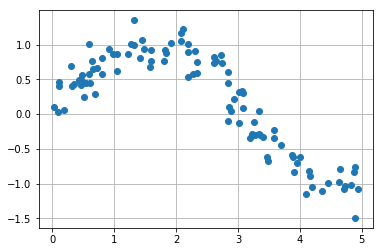

In [6]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>Формирование обучающего и тестового подмножеств</p>

In [7]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

y_train = y[:tr_n]
y_test = y[tr_n:]

<p>Обучение</p>

In [8]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", Ridge(alpha=0, fit_intercept=True))])

plModelTr_PL.fit(x_train, y_train)

Pipeline(steps=[('plF', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lr', Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

<p>Результат обучения</p>

In [ ]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)
#print("Количество итераций: ", plModelTr_PL.named_steps["lr"].n_iter_)

In [ ]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

In [ ]:
xx = np.linspace(0,5,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p>Проверка на тестовом подмножестве</p>

In [ ]:
plModelTr_PL.score(x_test, y_test)

<p>График</p>

<p><b>Классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Кросс-валидация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Cross-validation</p>

<p>The holdout method</p>


<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html">train_test_split</a>


In [5]:
from sklearn import cross_validation

In [6]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.4, random_state=0)

In [7]:
x_train.shape, y_train.shape

((60,), (60,))

<p>K-Folds</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html">KFold</a>

In [ ]:
from sklearn.cross_validation import KFold
kf = KFold(6, n_folds=3, shuffle=True, random_state=0)
kf

In [ ]:
for train_index, test_index in kf:
    print(train_index, test_index)

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html">cross_val_score</a>

In [16]:
from sklearn import svm 

In [31]:
clf = svm.SVR(kernel='linear')
scores = cross_validation.cross_val_score(clf, x_train, y_train, cv=4)

In [32]:
scores

array([ 0.44302705,  0.65144624,  0.74241664,  0.4094821 ])

In [12]:
logReg = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=12345)

In [33]:
linReg = linear_model.LinearRegression(fit_intercept=True)

In [34]:
scores = cross_validation.cross_val_score(linReg, x_train, y_train, cv=4, scoring="mean_squared_error")
scores

array([-0.30956403, -0.25007481, -0.10395478, -0.19575386])

In [27]:
print("Аккуратность: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 1.96))

Аккуратность: -0.21 (+/- 0.15)


<p>Leave-One-Out - LOO</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html">LeaveOneOut</a>

In [ ]:
from sklearn.cross_validation import LeaveOneOut

loo = LeaveOneOut(4)
for train, test in loo:
    print("%s %s" % (train, test))

<p>Использование Pipeline</p>

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_validation.cross_val_score(clf, iris.data, iris.target, cv=cv)

In [ ]:
predicted = cross_validation.cross_val_predict(logReg, x_train, y_train, cv=6)
predicted

<p>Grid</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html">GridSearchCV</a>

<p><b>Ридж-регрессия с кросс-валидацией</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html">RidgeCV</a>

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

In [ ]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>Формирование обучающего и тестового подмножеств</p>

In [ ]:
x = x[:, np.newaxis]

In [ ]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

<p>Обучение</p>

In [ ]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", RidgeCV(alphas=[0.001, 0.01, 0.1, 1], 
                                                                               fit_intercept=True, cv=4, 
                                                                               store_cv_values=False))])

plModelTr_PL.fit(x_train, y_train)

<p>Результат обучения</p>

In [ ]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)
print("Альфа: ", plModelTr_PL.named_steps["lr"].alpha_ )

In [ ]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

In [ ]:
xx = np.linspace(0,5,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p>Проверка на тестовом подмножестве</p>

In [ ]:
plModelTr_PL.score(x_test, y_test)

<p><b>Классификация c кросс-валидацией</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html">LogisticRegressionCV</a>

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/cross_validation.html">3.1. Cross-validation: evaluating estimator performance</a>